In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, r'C:\code\astrocam')
import pandas as pd
from pathlib import Path
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher
import matplotlib.pyplot as plt
import re
import numpy as np
from tqdm import tqdm

In [2]:
pi_data_file = r"D:\Astro\Objects\C23-SilverSliver\fwhm.csv" #r"D:\Astro\Objects\C30-NGC7331\fwhm.csv"
df = pd.read_csv(pi_data_file, skiprows=22)

In [3]:
fit_list = {x.name:str(x) for x in Path(r"D:\Astro").glob("**/*.fit")}
print(f"Found {len(fit_list)}")

Found 2998


In [4]:
df['fit_file'] = df.File.apply(lambda x: fit_list[re.findall(r'(Light_.*?C).*',x)[0]+".fit"])

In [5]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF SNR,PSF Scale,PSF Scale SNR,PSF Count,...,Stars,Star Residual,PSF Total Flux,PSF Total Power Flux,PSF Total Mean Flux,PSF Total Mean Power Flux,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file
0,16,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002536,0.089798,0.0,0.0,348,...,349,0.033531,8900.680,504352.9,90.42490,25.954420,0.64985,0.126120,0.001125,D:\Astro\20221029\C23\Light\Light_02055_180.0s...
1,18,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002396,0.088676,0.0,0.0,332,...,336,0.033234,8846.529,514923.6,86.00700,24.325040,0.60847,0.115510,0.000926,D:\Astro\20221029\C23\Light\Light_02057_180.0s...
2,21,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002399,0.090783,0.0,0.0,331,...,333,0.033322,8946.366,522111.5,84.96760,23.762710,0.59283,0.130120,0.000852,D:\Astro\20221029\C23\Light\Light_02060_180.0s...
3,22,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002365,0.090138,0.0,0.0,325,...,328,0.033447,8917.706,530677.2,83.83004,23.847950,0.57599,0.124070,0.000981,D:\Astro\20221029\C23\Light\Light_02061_180.0s...
4,15,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002383,0.086486,0.0,0.0,334,...,337,0.033698,8745.105,470922.0,86.60730,24.880180,0.66073,0.116990,0.001113,D:\Astro\20221029\C23\Light\Light_02054_180.0s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000148,0.027688,0.0,0.0,72,...,94,0.053695,5847.358,955573.0,16.89530,4.097067,2.13480,0.117040,0.004768,D:\Astro\20221123\C23\Light\Light_02499_180.0s...
190,191,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000140,0.026516,0.0,0.0,71,...,93,0.053774,5748.017,873346.9,16.58606,4.029455,2.14280,0.113990,0.004793,D:\Astro\20221123\C23\Light\Light_02500_180.0s...
191,192,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000127,0.023262,0.0,0.0,69,...,92,0.054109,5400.175,801925.7,16.17431,3.909214,2.15300,0.111840,0.004711,D:\Astro\20221123\C23\Light\Light_02501_180.0s...
192,193,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000130,0.026015,0.0,0.0,67,...,88,0.054835,5729.818,926711.3,15.76944,3.844080,2.13800,0.116400,0.004795,D:\Astro\20221123\C23\Light\Light_02502_180.0s...


In [6]:
print(f"Numer of images: {len(df)}")

Numer of images: 194


In [7]:
starfinder = StarFinder()
starmatcher = StarMatcher()
starData = starfinder.getStarData(df.fit_file[0], topk=40)
star_img = starData["star_mask"]
df_ref = starData["stars"]

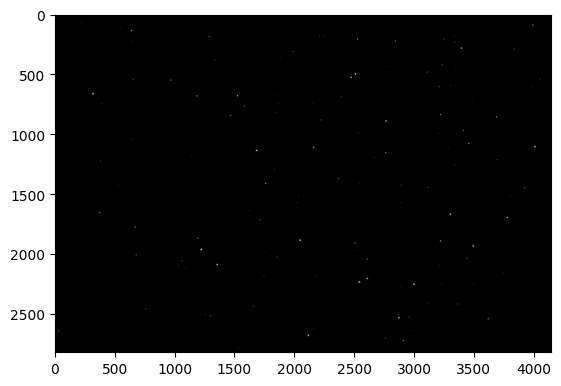

In [8]:
plt.imshow(star_img, cmap='gray')

In [9]:
df_ref

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,324,2536.617284,2237.206790,19.000977,19.000977,20.002992,20.616069,"[2516, 2217, 2557, 2258]",579758,9179,24.897849,25.099587
1,315,2603.060317,2207.438095,18.000977,19.000977,19.775561,19.182769,"[2584, 2187, 2623, 2228]",572523,9051,28.994084,31.584382
2,309,2505.003236,499.495146,18.000977,19.000977,19.803136,18.661122,"[2486, 480, 2525, 519]",130126,2158,25.439814,25.384136
3,306,1219.774510,1965.869281,18.000977,19.000977,20.569171,19.112111,"[1201, 1945, 1238, 1986]",508981,7968,25.290798,23.362848
4,294,315.897959,664.877551,19.000977,17.000977,19.043411,20.339532,"[296, 646, 335, 683]",172055,2740,19.864096,20.696416
5,291,2043.773196,1888.749141,18.000977,17.000977,18.223083,19.462595,"[2024, 1870, 2063, 1907]",489503,7734,24.565412,25.089368
6,288,1680.045139,1138.486111,19.000977,17.000977,18.407716,19.122717,"[1661, 1120, 1700, 1157]",295680,4733,24.353960,25.101919
7,284,2469.933099,527.757042,19.000977,17.000977,19.084486,19.143152,"[2450, 509, 2489, 546]",137369,2157,26.038653,27.058601
8,283,2522.802120,207.826855,18.000977,17.000977,19.134256,18.984766,"[2503, 189, 2542, 226]",54503,859,29.308779,30.240557
9,279,3487.609319,1935.200717,18.000977,17.000977,18.035131,18.813792,"[3468, 1917, 3507, 1954]",502296,7909,23.710280,25.282489


In [10]:
from pathlib import Path
import tempfile
import pickle

def get_stardata(fpath):
  fpath = Path(fpath)
  datafile = Path(tempfile.gettempdir()) / fpath.with_suffix('.stardata').name

  if datafile.exists():
    with datafile.open('rb') as f:
      starData = pickle.load(f)
  else:
    starData = starfinder.getStarData(fpath, topk=20)
    with datafile.open('wb') as f:
      pickle.dump(starData, f)
  return starData

def ave_fwhm(fname):
  starData = get_stardata(fname)
  df = starData["stars"]
  series = pd.Series({"myfwhm_x": df.fwhm_x.mean(), "myfwhm_y":df.fwhm_y.mean(), "myfwhm_ave":((df.fwhm_x + df.fwhm_y)/2).mean()})
  return series


In [11]:
tqdm.pandas(desc='Finding stars & calculating FWHM')
cols = df.fit_file.progress_apply(lambda x: ave_fwhm(x))
cols

Finding stars & calculating FWHM: 100%|██████████| 194/194 [00:07<00:00, 27.49it/s]


,myfwhm_x,myfwhm_y,myfwhm_ave
0,24.744273,25.078353,24.911313
1,23.689575,23.835907,23.762741
2,24.157991,24.332877,24.245434
3,24.732235,24.951049,24.841642
4,24.769712,25.269018,25.019365
...,...,...,...
189,33.701781,33.644476,33.673128
190,32.998909,32.407108,32.703009
191,35.219102,34.664080,34.941591
192,35.008504,34.622250,34.815377


In [12]:
df[['my_fwhm_x', 'my_fwhm_y', 'my_fwhm']] = cols

In [13]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF SNR,PSF Scale,PSF Scale SNR,PSF Count,...,PSF Total Power Flux,PSF Total Mean Flux,PSF Total Mean Power Flux,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file,my_fwhm_x,my_fwhm_y,my_fwhm
0,16,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002536,0.089798,0.0,0.0,348,...,504352.9,90.42490,25.954420,0.64985,0.126120,0.001125,D:\Astro\20221029\C23\Light\Light_02055_180.0s...,24.744273,25.078353,24.911313
1,18,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002396,0.088676,0.0,0.0,332,...,514923.6,86.00700,24.325040,0.60847,0.115510,0.000926,D:\Astro\20221029\C23\Light\Light_02057_180.0s...,23.689575,23.835907,23.762741
2,21,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002399,0.090783,0.0,0.0,331,...,522111.5,84.96760,23.762710,0.59283,0.130120,0.000852,D:\Astro\20221029\C23\Light\Light_02060_180.0s...,24.157991,24.332877,24.245434
3,22,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002365,0.090138,0.0,0.0,325,...,530677.2,83.83004,23.847950,0.57599,0.124070,0.000981,D:\Astro\20221029\C23\Light\Light_02061_180.0s...,24.732235,24.951049,24.841642
4,15,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.002383,0.086486,0.0,0.0,334,...,470922.0,86.60730,24.880180,0.66073,0.116990,0.001113,D:\Astro\20221029\C23\Light\Light_02054_180.0s...,24.769712,25.269018,25.019365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000148,0.027688,0.0,0.0,72,...,955573.0,16.89530,4.097067,2.13480,0.117040,0.004768,D:\Astro\20221123\C23\Light\Light_02499_180.0s...,33.701781,33.644476,33.673128
190,191,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000140,0.026516,0.0,0.0,71,...,873346.9,16.58606,4.029455,2.14280,0.113990,0.004793,D:\Astro\20221123\C23\Light\Light_02500_180.0s...,32.998909,32.407108,32.703009
191,192,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000127,0.023262,0.0,0.0,69,...,801925.7,16.17431,3.909214,2.15300,0.111840,0.004711,D:\Astro\20221123\C23\Light\Light_02501_180.0s...,35.219102,34.664080,34.941591
192,193,True,False,D:/Astro/Objects/C23-SilverSliver/subs/Light_0...,0.0,0.000130,0.026015,0.0,0.0,67,...,926711.3,15.76944,3.844080,2.13800,0.116400,0.004795,D:\Astro\20221123\C23\Light\Light_02502_180.0s...,35.008504,34.622250,34.815377


[ 0.0434426  24.62081605]
[0.0178266  2.93330022]


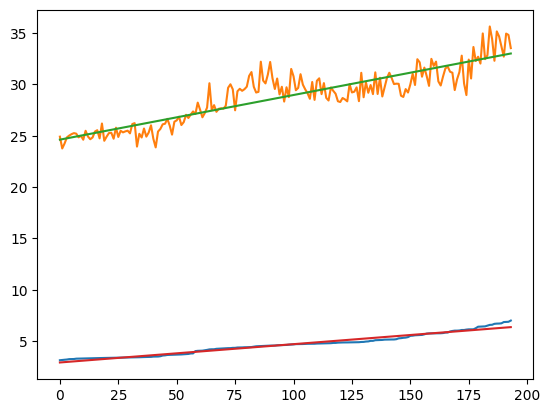

In [14]:
import numpy as np
plt.plot(df.FWHM)
plt.plot(df.my_fwhm)
# plt.plot(df.my_fwhm_y-6.5)
# plt.plot(df.my_fwhm-6.5)

z = np.polyfit(df.index, df.my_fwhm, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

z = np.polyfit(df.index, df.FWHM, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

plt.show()

In [15]:
frames = []
for tgt_file in tqdm(df.fit_file, desc="Processing"):

    starData = get_stardata(tgt_file)
    df_tgt = starData['stars']

    starmatcher.matchStars(df_ref, df_tgt)
    df_matched = pd.merge(left=df_ref,
                    right=df_tgt[df_tgt.starno.notna()],
                    left_index=True,
                    right_on='starno',
                    how='right',
                    suffixes=["_ref", "_tgt"])
    df_matched['fwhm_x_diff'] = df_matched.fwhm_x_ref - df_matched.fwhm_x_tgt
    df_matched['fwhm_y_diff'] = df_matched.fwhm_y_ref - df_matched.fwhm_y_tgt

    df_matched.set_index('starno', inplace=True)
    frames.append(df_matched)

Processing:   0%|          | 0/194 [00:00<?, ?it/s]

Processing: 100%|██████████| 194/194 [06:21<00:00,  1.97s/it]


In [16]:
with open('fwhm_data.pkl', 'wb') as f:
    pickle.dump(frames, f)

In [17]:
with open('fwhm_data.pkl', 'rb') as f:
    frames = pickle.load(f)

[ 0.02844063 25.2564922 ]


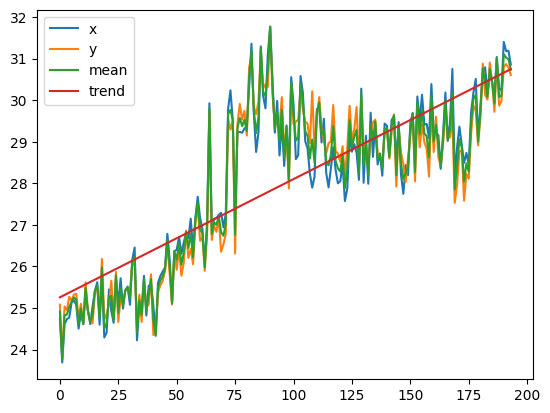

In [18]:
mean_fwhm_x = [df_matched.fwhm_x_tgt.mean() for df_matched in frames]
mean_fwhm_y = [df_matched.fwhm_y_tgt.mean() for df_matched in frames]

plt.plot(mean_fwhm_x, label='x')
plt.plot(mean_fwhm_y, label='y')
mean_fwhm = (np.array(mean_fwhm_x) + np.array(mean_fwhm_y))/2
plt.plot(mean_fwhm, label='mean')
z = np.polyfit(np.arange(len(mean_fwhm)), mean_fwhm, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index), label='trend')
plt.legend()
plt.show()

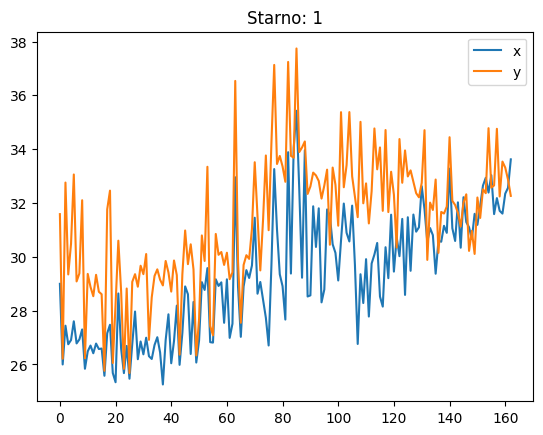

In [19]:
starno=1

fwhm_x = [df_matched.loc[starno, "fwhm_x_tgt"] for df_matched in frames if starno in df_matched.index]
fwhm_y = [df_matched.loc[starno, "fwhm_y_tgt"] for df_matched in frames if starno in df_matched.index]

plt.plot(fwhm_x, label='x')
plt.plot(fwhm_y, label='y')
plt.title(f"Starno: {starno}")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Starno: 1')

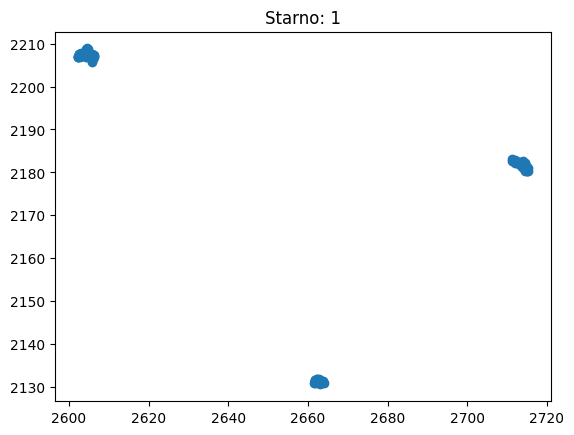

In [20]:
starno=1
cx = [df_matched.loc[starno, "cluster_cx_tgt"] for df_matched in frames if starno in df_matched.index]
cy = [df_matched.loc[starno, "cluster_cy_tgt"] for df_matched in frames if starno in df_matched.index]
plt.scatter(cx, cy)
plt.title(f"Starno: {starno}")